[Reference](https://towardsdatascience.com/improve-your-data-science-workflow-with-rolling-functions-in-pandas-69c4b44e3f7e)

In [6]:
import pandas as pd
import random

In [7]:
data = []
date_range = pd.date_range("01/07/2020", "01/13/2020")

for i in range(len(date_range)):
    
    sales_cash = random.randint(1, 10)
    sales_card = random.randint(1, 10)

    day_type = "Weekday"

    if date_range[i].weekday()>4:
        day_type = "Weekend"
    
    data.append([str(date_range[i].date()), day_type, "Cash", sales_cash])
    data.append([str(date_range[i].date()), day_type, "Card", sales_card])
    
data = pd.DataFrame(data, columns=["Date", "Day_Type", "Payment_type", "Sales"])

# Rolling Functions


In [8]:
type(data.rolling(window = 4))

pandas.core.window.rolling.Rolling

## Rolling Sum


In [9]:
data["rolling_sum_2"] = data.rolling(window = 2).Sales.sum()
data

,Date,Day_Type,Payment_type,Sales,rolling_sum_2
0,2020-01-07,Weekday,Cash,4,NaN
1,2020-01-07,Weekday,Card,1,5.0
2,2020-01-08,Weekday,Cash,8,9.0
3,2020-01-08,Weekday,Card,5,13.0
4,2020-01-09,Weekday,Cash,3,8.0
5,2020-01-09,Weekday,Card,8,11.0
6,2020-01-10,Weekday,Cash,9,17.0
7,2020-01-10,Weekday,Card,4,13.0
8,2020-01-11,Weekend,Cash,8,12.0
9,2020-01-11,Weekend,Card,4,12.0


In [12]:
data["rolling_sum_2"] = data.rolling(window = 2, min_periods=1).Sales.sum()
data

,Date,Day_Type,Payment_type,Sales,rolling_sum_2,rolling_sum_2days
0,2020-01-07,Weekday,Cash,4,4.0,4.0
1,2020-01-07,Weekday,Card,1,5.0,5.0
2,2020-01-08,Weekday,Cash,8,9.0,13.0
3,2020-01-08,Weekday,Card,5,13.0,18.0
4,2020-01-09,Weekday,Cash,3,8.0,16.0
5,2020-01-09,Weekday,Card,8,11.0,24.0
6,2020-01-10,Weekday,Cash,9,17.0,20.0
7,2020-01-10,Weekday,Card,4,13.0,24.0
8,2020-01-11,Weekend,Cash,8,12.0,21.0
9,2020-01-11,Weekend,Card,4,12.0,25.0


## Rolling Sum Over Days


In [11]:
data["Date"] = pd.to_datetime(data["Date"])
data["rolling_sum_2days"] = data.rolling(window = '2d', on = "Date").Sales.sum()
data

,Date,Day_Type,Payment_type,Sales,rolling_sum_2,rolling_sum_2days
0,2020-01-07,Weekday,Cash,4,4.0,4.0
1,2020-01-07,Weekday,Card,1,5.0,5.0
2,2020-01-08,Weekday,Cash,8,9.0,13.0
3,2020-01-08,Weekday,Card,5,13.0,18.0
4,2020-01-09,Weekday,Cash,3,8.0,16.0
5,2020-01-09,Weekday,Card,8,11.0,24.0
6,2020-01-10,Weekday,Cash,9,17.0,20.0
7,2020-01-10,Weekday,Card,4,13.0,24.0
8,2020-01-11,Weekend,Cash,8,12.0,21.0
9,2020-01-11,Weekend,Card,4,12.0,25.0


In [13]:
data.groupby("Date").last()
data

,Date,Day_Type,Payment_type,Sales,rolling_sum_2,rolling_sum_2days
0,2020-01-07,Weekday,Cash,4,4.0,4.0
1,2020-01-07,Weekday,Card,1,5.0,5.0
2,2020-01-08,Weekday,Cash,8,9.0,13.0
3,2020-01-08,Weekday,Card,5,13.0,18.0
4,2020-01-09,Weekday,Cash,3,8.0,16.0
5,2020-01-09,Weekday,Card,8,11.0,24.0
6,2020-01-10,Weekday,Cash,9,17.0,20.0
7,2020-01-10,Weekday,Card,4,13.0,24.0
8,2020-01-11,Weekend,Cash,8,12.0,21.0
9,2020-01-11,Weekend,Card,4,12.0,25.0


## Grouped Rolling


In [14]:
data["rolling_sum_grouped"] = data.groupby("Payment_type").rolling(window = 2).\
                              Sales.sum().reset_index().set_index("level_1").\
                              sort_index()["Sales"]

In [15]:
data

,Date,Day_Type,Payment_type,Sales,rolling_sum_2,rolling_sum_2days,rolling_sum_grouped
0,2020-01-07,Weekday,Cash,4,4.0,4.0,NaN
1,2020-01-07,Weekday,Card,1,5.0,5.0,NaN
2,2020-01-08,Weekday,Cash,8,9.0,13.0,12.0
3,2020-01-08,Weekday,Card,5,13.0,18.0,6.0
4,2020-01-09,Weekday,Cash,3,8.0,16.0,11.0
5,2020-01-09,Weekday,Card,8,11.0,24.0,13.0
6,2020-01-10,Weekday,Cash,9,17.0,20.0,12.0
7,2020-01-10,Weekday,Card,4,13.0,24.0,12.0
8,2020-01-11,Weekend,Cash,8,12.0,21.0,17.0
9,2020-01-11,Weekend,Card,4,12.0,25.0,8.0


# Additional Rolling Methods


## Rolling Mean


In [16]:
data["Date"] = pd.to_datetime(data["Date"])
data["rolling_avg_3days"] = data.rolling(window = 6, min_periods=1).Sales.mean()
data

,Date,Day_Type,Payment_type,Sales,rolling_sum_2,rolling_sum_2days,rolling_sum_grouped,rolling_avg_3days
0,2020-01-07,Weekday,Cash,4,4.0,4.0,NaN,4.000000
1,2020-01-07,Weekday,Card,1,5.0,5.0,NaN,2.500000
2,2020-01-08,Weekday,Cash,8,9.0,13.0,12.0,4.333333
3,2020-01-08,Weekday,Card,5,13.0,18.0,6.0,4.500000
4,2020-01-09,Weekday,Cash,3,8.0,16.0,11.0,4.200000
5,2020-01-09,Weekday,Card,8,11.0,24.0,13.0,4.833333
6,2020-01-10,Weekday,Cash,9,17.0,20.0,12.0,5.666667
7,2020-01-10,Weekday,Card,4,13.0,24.0,12.0,6.166667
8,2020-01-11,Weekend,Cash,8,12.0,21.0,17.0,6.166667
9,2020-01-11,Weekend,Card,4,12.0,25.0,8.0,6.000000


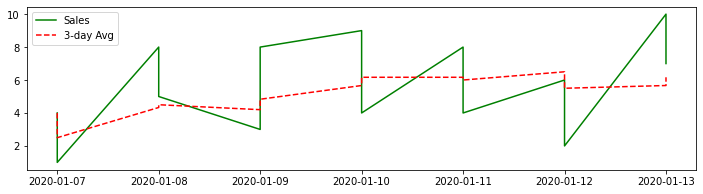

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.plot(data["Date"], data["Sales"], label = "Sales", color = "green")
plt.plot(data["Date"], data["rolling_avg_3days"], 
         color = "red", label = "3-day Avg", linestyle="--")

plt.legend()
plt.show()